## 2024 Economic Analysis with Python using Fred API ##

![2024 Economy Logo](https://www.promarket.org/wp-content/uploads/2024/01/Econ_Trends.jpg)




In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import time
from dotenv import load_dotenv

# Set plotting style and pandas display options
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]


from fredapi import Fred

# Retrieve your API key from environment variables
load_dotenv()
fred_key = os.getenv("API_KEY")


## 1. Obtain Fred Economic Data ##

In [3]:
fred = Fred(api_key=fred_key)

## 2. Search Last Updated Consumer Price Index Data  ##

In [4]:
# Search for Consumer Price Index (CPI) data, ordered by the most recently updated
cpi_search = fred.search('Consumer Price Index', order_by='last_updated')

In [5]:
cpi_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
RSALES,RSALES,2024-05-04,2024-05-04,Real Retail Sales (DISCONTINUED),1947-01-01,2001-04-01,Monthly,M,Millions of Dollars,Mil. of $,Seasonally Adjusted,SA,2005-09-30 01:08:59-05:00,18,Deflated Using the Consumer Price Index for Al...
TP5A11,TP5A11,2024-05-04,2024-05-04,"5-Year 2-3/8% Treasury Inflation-Indexed Note,...",2006-05-01,2011-03-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2011-04-01 09:46:26-05:00,1,Averages of business days. Yield to maturity o...
DTP5A11,DTP5A11,2024-05-04,2024-05-04,"5-Year 2-3/8% Treasury Inflation-Indexed Note,...",2006-04-26,2011-04-14,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2011-04-15 09:01:20-05:00,1,Yield to maturity on accrued principal. Treasu...
WTP5A11,WTP5A11,2024-05-04,2024-05-04,"5-Year 2-3/8% Treasury Inflation-Indexed Note,...",2006-04-28,2011-04-15,"Weekly, Ending Friday",W,Percent,%,Not Seasonally Adjusted,NSA,2011-04-25 09:24:14-05:00,0,"Treasury Inflation-Protected Securities, or TI..."
TP10J12,TP10J12,2024-05-04,2024-05-04,10-Year 3-3/8% Treasury Inflation-Indexed Note...,2002-02-01,2011-12-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2012-01-03 09:17:19-06:00,1,"Treasury Inflation-Protected Securities, or TI..."


## 3. Pulling S&P 500 Data from 2023 - 2024

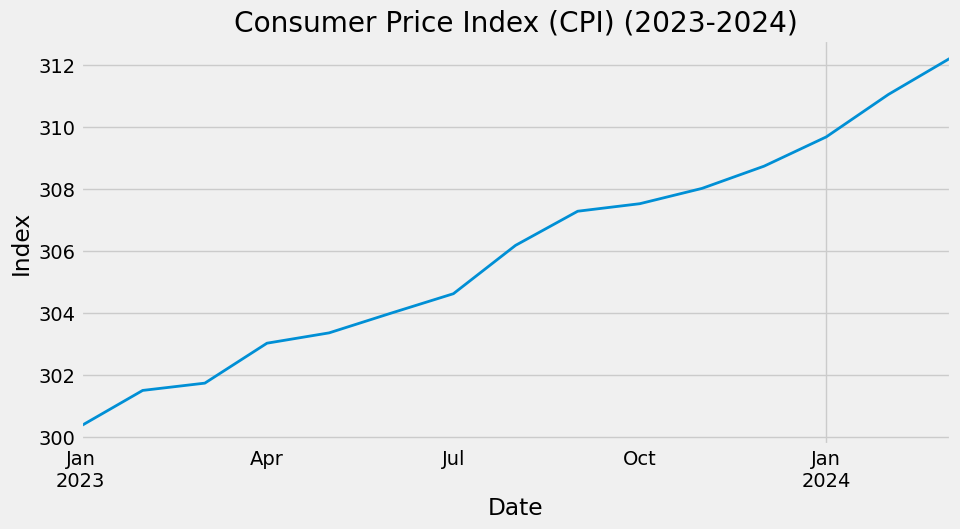

In [6]:
# Get the Consumer Price Index series data
cpi = fred.get_series(series_id='CPIAUCSL', observation_start='2023-01-01', observation_end='2024-12-31')

# Plot the CPI data using matplotlib
# Set the figure size, title, and line width for better visualization
cpi.plot(figsize=(10, 5), title='Consumer Price Index (CPI) (2023-2024)', lw=2)
plt.xlabel('Date')  # Label the x-axis as 'Date'
plt.ylabel('Index')  # Label the y-axis as 'Index'
plt.show()  # Display the plot

## 4. Merging Unemployment Rates by each state

In [6]:
# Search the FRED database for time series related to state unemployment rates
# Filter the results to include only monthly data that is seasonally adjusted and measured in percent
unemp_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

# Further filter the DataFrame to include only series whose titles contain 'Unemployment Rate'
# This helps to narrow down the search to more specific data related to our criteria
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

# Display the filtered DataFrame
unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-04-30,2024-04-30,Unemployment Rate,1948-01-01,2024-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-04-05 07:50:02-05:00,95,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2024-04-30,2024-04-30,Unemployment Rate - Black or African American,1972-01-01,2024-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-04-05 07:50:16-05:00,72,The series comes from the 'Current Population ...
CAUR,CAUR,2024-04-30,2024-04-30,Unemployment Rate in California,1976-01-01,2024-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-04-22 10:41:02-05:00,64,None
TXUR,TXUR,2024-04-30,2024-04-30,Unemployment Rate in Texas,1976-01-01,2024-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-04-22 10:41:03-05:00,56,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2024-04-30,2024-04-30,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,54,Series Is Presented Here As Three Variables--(...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LNS14000048,LNS14000048,2024-04-30,2024-04-30,Unemployment Rate - 25 Yrs. & over,1948-01-01,2024-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-04-05 07:51:30-05:00,6,The series comes from the 'Current Population ...
LNS14000089,LNS14000089,2024-04-30,2024-04-30,Unemployment Rate - 25-34 Yrs.,1948-01-01,2024-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-04-05 07:51:34-05:00,6,The series comes from the 'Current Population ...
M08311USM156SNBR,M08311USM156SNBR,2024-04-30,2024-04-30,"Unemployment Rate, Married Males, Spouse Prese...",1954-11-01,1968-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:28:17-05:00,6,Beginning In 1960 Data Include Alaska And Hawa...


In [7]:
# Initialize an empty list to store individual data frames
all_results = []

# Loop through each series ID provided in the unemployment DataFrame index
for myid in unemp_df.index:
    # Fetch the series data from FRED
    results = fred.get_series(myid)
    # Convert the series to a DataFrame with a column named after the series ID
    results = results.to_frame(name=myid)
    # Append the DataFrame to the list of results
    all_results.append(results)
    # Pause execution briefly to respect FRED API rate limits
    time.sleep(0.1)

# Concatenate all DataFrame objects in the list into a single DataFrame, and drop specific columns not needed
unemp_results = pd.concat(all_results, axis=1).drop(['M08311USM156SNBR', 'M0892AUSM156SNBR'], axis=1)


In [8]:
# Identify and remove columns where the column name length exceeds 4 characters
cols_to_drop = []
for i in unemp_results:
    if len(i) > 4:
        cols_to_drop.append(i)
unemp_results = unemp_results.drop(columns = cols_to_drop, axis=1)

In [9]:
# Copy the cleaned results to a new DataFrame for further manipulation
unemp_states = unemp_results.copy()
# Remove any rows with missing values to ensure clean data for analysis
unemp_states = unemp_states.dropna()
# Create a dictionary to map series IDs to state names, removing the prefix from the titles
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ', '').to_dict()
# Apply the state names as column headers in the DataFrame
unemp_states.columns = [id_to_state[c] for c in unemp_states.columns]
# Drop data for Puerto Rico
unemp_states = unemp_states.drop(columns=[col for col in unemp_states.columns if "Puerto Rico" in col], axis=1)


In [10]:
# Convert the DataFrame from wide format to long format for plotting
unemp_long = unemp_states.reset_index().melt(id_vars='index', var_name='State', value_name='Unemployment Rate')
unemp_long = unemp_long.rename(columns={'index': 'Date'})

# Create a line plot using Plotly Express to visualize unemployment rates across states over time
fig = px.line(
    unemp_long,
    x='Date',
    y='Unemployment Rate',
    color='State',
    title='State-wise Employment Rates (2023-2024)',
    labels={'Unemployment Rate': 'Unemployment Rate (%)'}
)
fig.show()

## 5. Pull March 2024 Unemployment Rates Per State

In [11]:
# Rename 'the District of Columbia' to 'District Of Columbia' for consistency in naming
unemp_states = unemp_states.rename(columns={'the District of Columbia': 'District Of Columbia'})


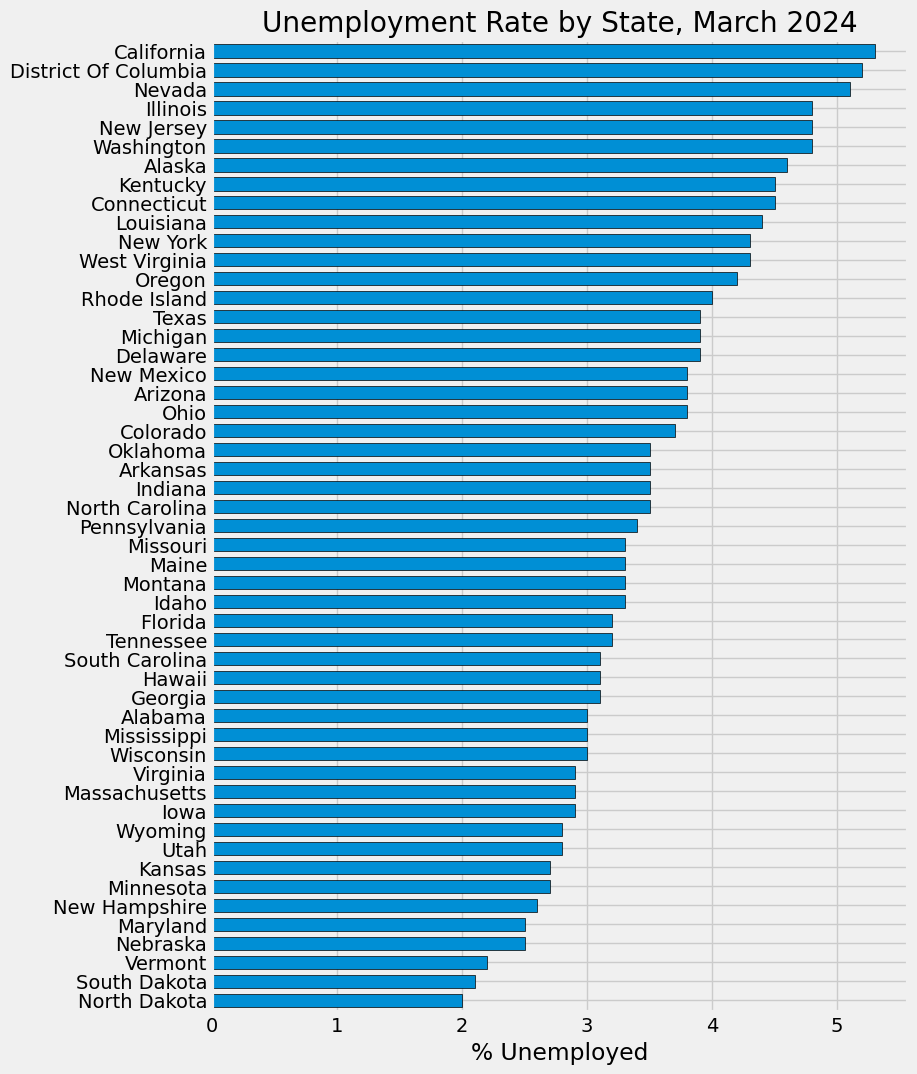

In [12]:
# Plotting the unemployment rate for each state as of March 2024 using a horizontal bar chart
ax = unemp_states.loc[unemp_states.index == '2024-03-01'].T \
    .sort_values('2024-03-01') \
    .plot(kind='barh', figsize=(8, 12), width=0.7, edgecolor='black', title='Unemployment Rate by State, March 2024')
# Remove the legend as it is unnecessary in this context
ax.legend().remove()
# Set the x-axis label
ax.set_xlabel('% Unemployed')
plt.show()

## 6. Comparing PCE and Inflation rates from 2023 - 2024

In [13]:
# Fetch PCE data
pce_data = fred.get_series(series_id='PCE', observation_start='2023-01-01', observation_end='2024-12-31')
pce_percent_change = pce_data.pct_change(1) * 100

# Fetch Inflation Rate data (CPI)
inflation_data = fred.get_series(series_id='CPIAUCSL', observation_start='2023-01-01', observation_end='2024-12-31')
inflation_rate = inflation_data.pct_change(1) * 100

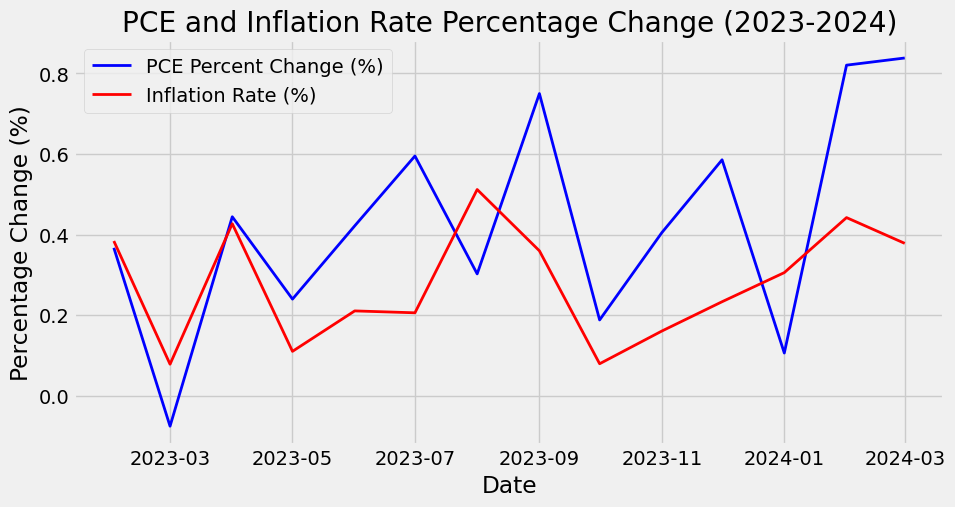

In [14]:
# Plotting the PCE percentage change and inflation rate
plt.figure(figsize=(10, 5))
plt.plot(pce_percent_change.index, pce_percent_change, label='PCE Percent Change (%)', color='blue', lw=2)
plt.plot(inflation_rate.index, inflation_rate, label='Inflation Rate (%)', color='red', lw=2)

# Title and labels
plt.title('PCE and Inflation Rate Percentage Change (2023-2024)')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')

# Add grid and legend
plt.grid(visible=True)
plt.legend()

# Show the plot
plt.show()